# IRIS dataset classification using ANN

In 1936, the British statistician and biologist Ronald Fisher published The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

Two of the three species were collected on the Gaspé Peninsula "all from the same pasture, collected on the same day and measured at the same time by the same person with the same instrument".

The dataset consists of 50 samples from each of the three species of iris.

Four traits were measured for each sample: length and width of calyx and petals in centimetres. 

Identification of the fescue species by the dimensions of the different petals

- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://www.kaggle.com/arshid/iris-flower-dataset

# Task

Your goal is to create a classification neural network to distinguish different species of killer whales.

We will use the same data as in the k-means/SVM chapter, you can build on it.

As you work through this task, the following points will be completed in turn:

- Retrieve the data and display the basic statistics
- Use binary encoding to prepare the data.
- Standardize the input values using StandardScaler
- Split the data into training, test and validation

- Create a neural network model, don't be afraid to experiment with the number of hidden layers and their size
- You will probably need Dense layers, you can try the Drop layer
- Use a relay as the activation function, use a Softmax layer for the output

- When learning, use the categorical_crossentropy cost function
- The optimization algorithm will be ADAM
- You can collect other accuracy metrics

- Save the learned model to a file

- Test the learned model, find R2 and accuracy
- Plot the substitution matrix

- Plot the learning history

- Test the model on your input data (create inference)

# Data retrieval and basic statistics
# - data preview
# - basic statistics
# - NULL values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('../dataset/IRIS.csv')

# Data preview
print("Data Preview:")
print(data.head())
print("\nData Shape:", data.shape)
print("\nData Info:")
print(data.info())
print("\nBasic Statistics:")
print(data.describe())
print("\nNULL Values:")
print(data.isnull().sum())
print("\nSpecies Distribution:")
print(data['species'].value_counts())

Data Preview:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Data Shape: (150, 5)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Basic Statistics:
       sepal_length  sepal_width  petal_length  petal_wid

# Data visualization
# - distribution of values

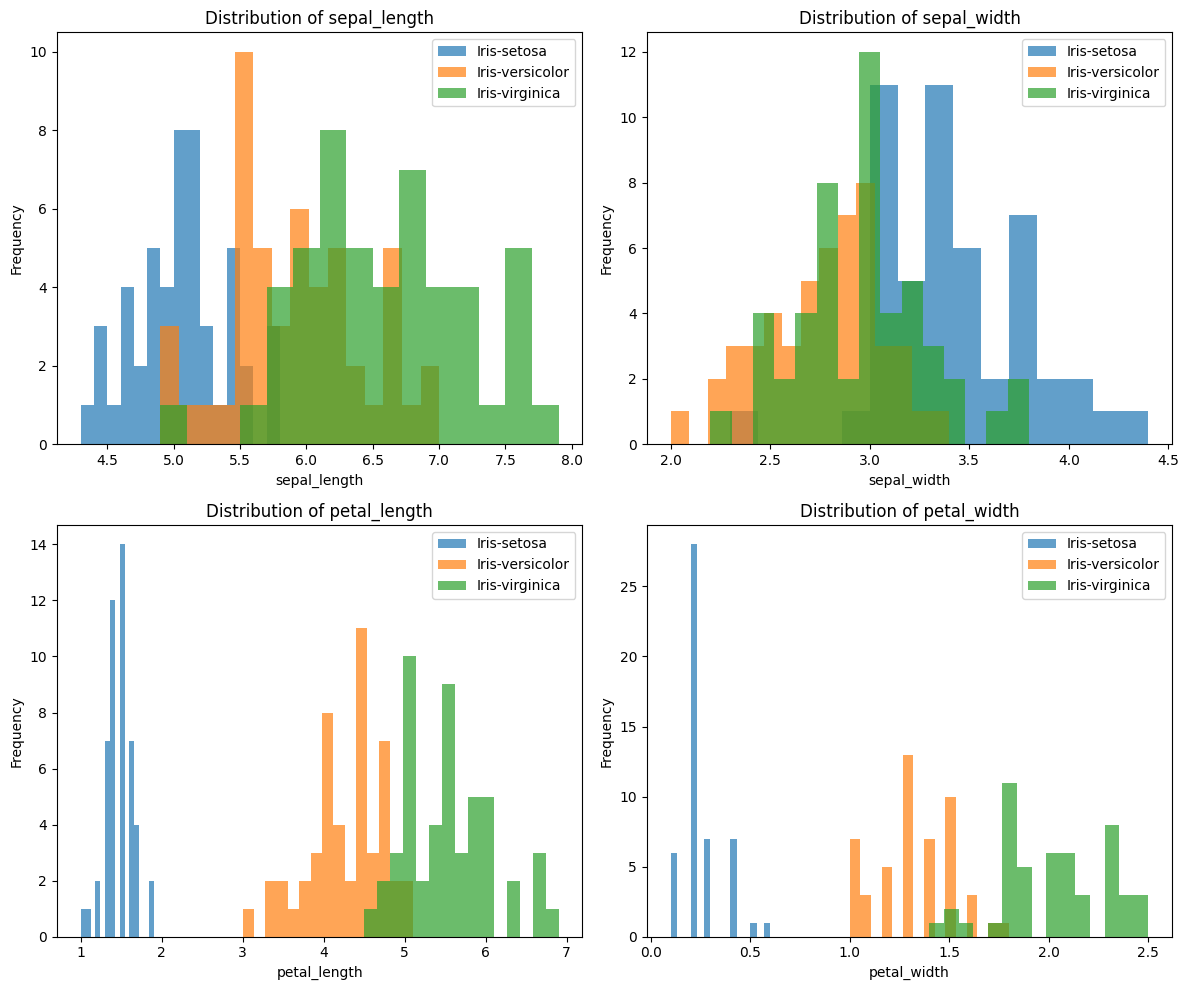

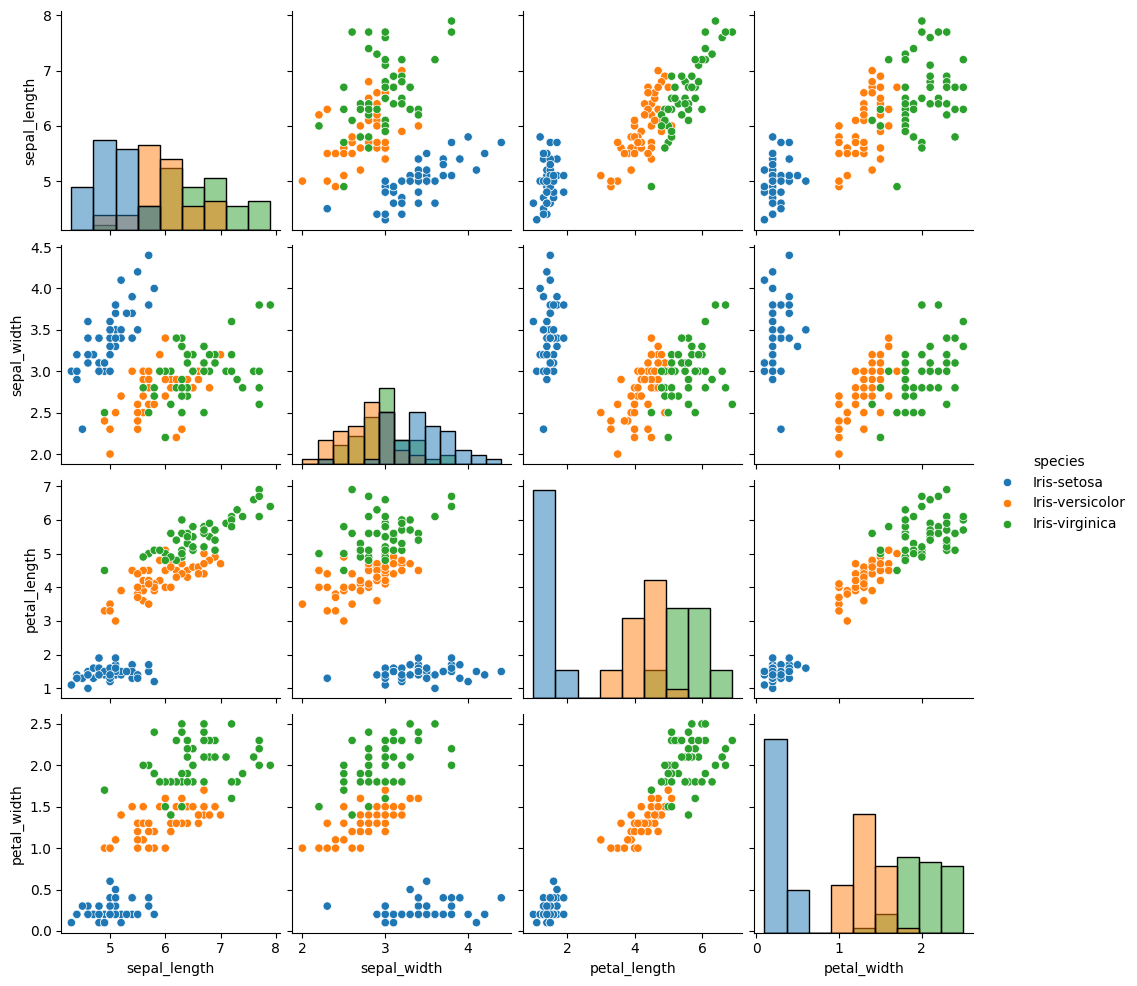

In [2]:
# Data visualization - distribution of values
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    for species in data['species'].unique():
        species_data = data[data['species'] == species][feature]
        ax.hist(species_data, alpha=0.7, label=species, bins=15)
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()

plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(data, hue='species', diag_kind='hist')
plt.show()


# Data preparation
# - binary encoding
# - standardization of input variables

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Separate features and target
X = data.iloc[:, 0:4].values  # Features: sepal_length, sepal_width, petal_length, petal_width
y = data.iloc[:, 4].values    # Target: species

# Binary encoding for target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=3)

print("Original labels:", y[:5])
print("Encoded labels:", y_encoded[:5])
print("Categorical labels (first 5):")
print(y_categorical[:5])
print("\nLabel mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i}: {label}")

# Split data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nTraining set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Validation set shape: X={X_val.shape}, y={y_val.shape}")
print(f"Test set shape: X={X_test.shape}, y={y_test.shape}")

# Standardization of input variables using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("\nStandardized data statistics (training set):")
print(f"Mean: {X_train_scaled.mean(axis=0)}")
print(f"Std: {X_train_scaled.std(axis=0)}")


Original labels: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
Encoded labels: [0 0 0 0 0]
Categorical labels (first 5):
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Label mapping:
0: Iris-setosa
1: Iris-versicolor
2: Iris-virginica

Training set shape: X=(105, 4), y=(105, 3)
Validation set shape: X=(22, 4), y=(22, 3)
Test set shape: X=(23, 4), y=(23, 3)

Standardized data statistics (training set):
Mean: [ 2.38327876e-15 -1.16864190e-15 -4.73695157e-16  1.60718000e-16]
Std: [1. 1. 1. 1.]


## Neural network modelling

Neural network model
* Sequential model - data flows from the input layer through hidden layers to the output layer.
* Dense layer connects each neuron from the previous layer to each neuron in the layer.
* Drop layer randomly sets the input units to 0 at each step during the training period, which helps prevent overfitting.
* RELU and Softmax activation functions are used. 
* The last Softmax function is used in the output layer because this project is a classification project.

* Compilation is the last step in model building.
* The optimizer we use is Adam. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to iteratively update the network weights based on the training data.
* Cost function - categorical_crossentropy, a special loss function for classification (https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class).
* Another metric - Accuracy - is computed during learning.

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Create a sequential model
model = Sequential()

# Input layer
model.add(Input(shape=(4,)))  # 4 features: sepal_length, sepal_width, petal_length, petal_width

# First hidden layer with ReLU activation
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

# Second hidden layer with ReLU activation
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

# Output layer with Softmax activation (3 classes)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5143 - loss: 1.0046 - val_accuracy: 0.4091 - val_loss: 0.9811
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5143 - loss: 1.0196 - val_accuracy: 0.6818 - val_loss: 0.9452
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5238 - loss: 0.9718 - val_accuracy: 0.7727 - val_loss: 0.9116
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5524 - loss: 0.9314 - val_accuracy: 0.7727 - val_loss: 0.8805
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5905 - loss: 0.8682 - val_accuracy: 0.7727 - val_loss: 0.8504
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5905 - loss: 0.8596 - val_accuracy: 0.7727 - val_loss: 0.8228
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6476 - loss: 0.8550 - val_accuracy: 0.7727 - val_loss: 0.7958
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7333 - loss: 0.7690 - val_accuracy: 0.7727 - val_loss:

# Save the model

In [7]:
# Save the learned model to a file
model.save('iris_classification_model.keras')
print("Model saved successfully as 'iris_classification_model.keras'")


Model saved successfully as 'iris_classification_model.keras'


# Show learning history

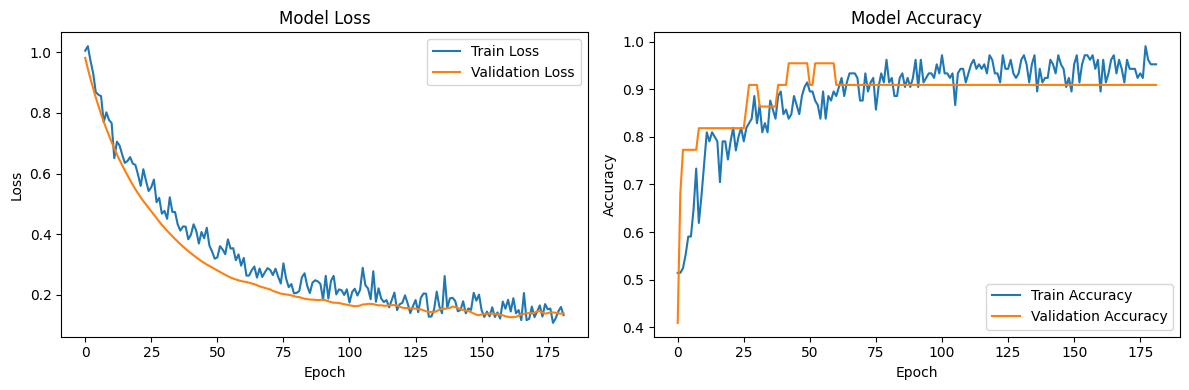

In [8]:
# Plot the learning history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()


# Model Verification
# - Prediction of test values
# - Accuracy
# - Confusion matrix of training and test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Training Accuracy: 0.9714
Test Accuracy: 0.8261

Training R2 Score: 0.9571
Test R2 Score: 0.7262

Test Loss (categorical_crossentropy): 0.2379
Test Accuracy: 0.8261

Confusion Matrix (Test Data):
[[6 0 0]
 [0 5 3]
 [0 1 8]]

Confusion Matrix (Training Data):
[[35  0  0]
 [ 0 33  2]
 [ 0  1 34]]


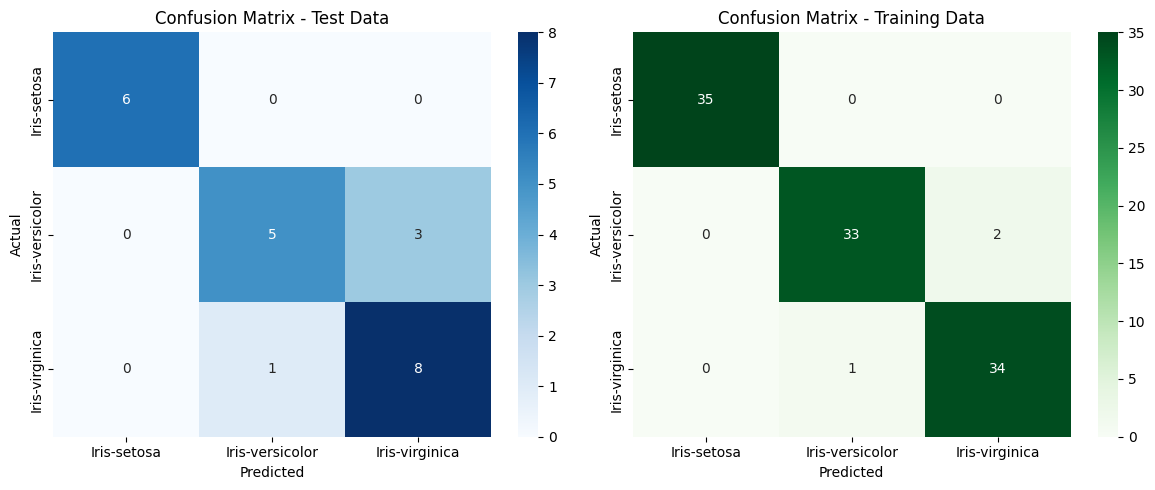

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
import numpy as np

# Predictions on test data
y_test_pred = model.predict(X_test_scaled)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Predictions on training data
y_train_pred = model.predict(X_train_scaled)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_true_classes = np.argmax(y_train, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test_true_classes, y_test_pred_classes)
train_accuracy = accuracy_score(y_train_true_classes, y_train_pred_classes)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate R2 score
r2_test = r2_score(y_test_true_classes, y_test_pred_classes)
r2_train = r2_score(y_train_true_classes, y_train_pred_classes)

print(f"\nTraining R2 Score: {r2_train:.4f}")
print(f"Test R2 Score: {r2_test:.4f}")

# Evaluate model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Loss (categorical_crossentropy): {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion matrix for test data
cm_test = confusion_matrix(y_test_true_classes, y_test_pred_classes)
print("\nConfusion Matrix (Test Data):")
print(cm_test)

# Confusion matrix for training data
cm_train = confusion_matrix(y_train_true_classes, y_train_pred_classes)
print("\nConfusion Matrix (Training Data):")
print(cm_train)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Test Data')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(label_encoder.classes_)
axes[0].set_yticklabels(label_encoder.classes_)

# Training confusion matrix
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Training Data')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(label_encoder.classes_)
axes[1].set_yticklabels(label_encoder.classes_)

plt.tight_layout()
plt.show()


# Using the model
# Test the model on your input data (create inference)
# The answer should therefore be Iris virginica

In [10]:
# Test the model with custom input data
# Input: [sepal_length, sepal_width, petal_length, petal_width]
test_input = np.array([[1, 2, 1, 2]])

# Standardize the input using the same scaler
test_input_scaled = scaler.transform(test_input)

# Make prediction
test_predictions = model.predict(test_input_scaled, verbose=0)

print("Input features: [sepal_length=1, sepal_width=2, petal_length=1, petal_width=2]")
print("\nPrediction probabilities:")
print(f"Iris setosa:     {test_predictions[0][0]:.6f}")
print(f"Iris versicolor: {test_predictions[0][1]:.6f}")
print(f"Iris virginica:  {test_predictions[0][2]:.6f}")

# Get the predicted class
predicted_class_idx = np.argmax(test_predictions[0])
predicted_class = label_encoder.classes_[predicted_class_idx]
print(f"\nPredicted class: {predicted_class} (index: {predicted_class_idx})")
print(f"Confidence: {test_predictions[0][predicted_class_idx]:.4f}")

# Test with a few more examples from the dataset
print("\n" + "="*60)
print("Testing with sample data from the dataset:")
print("="*60)

sample_indices = [0, 50, 100]  # One from each class
for idx in sample_indices:
    sample = X[idx:idx+1]
    sample_scaled = scaler.transform(sample)
    pred = model.predict(sample_scaled, verbose=0)
    pred_class_idx = np.argmax(pred[0])
    pred_class = label_encoder.classes_[pred_class_idx]
    true_class = y[idx]
    
    print(f"\nSample {idx}:")
    print(f"  Features: {sample[0]}")
    print(f"  True class: {true_class}")
    print(f"  Predicted class: {pred_class}")
    print(f"  Confidence: {pred[0][pred_class_idx]:.4f}")
    print(f"  Correct: {'✓' if true_class == pred_class else '✗'}")

Input features: [sepal_length=1, sepal_width=2, petal_length=1, petal_width=2]

Prediction probabilities:
Iris setosa:     0.908000
Iris versicolor: 0.091632
Iris virginica:  0.000368

Predicted class: Iris-setosa (index: 0)
Confidence: 0.9080

Testing with sample data from the dataset:

Sample 0:
  Features: [5.1 3.5 1.4 0.2]
  True class: Iris-setosa
  Predicted class: Iris-setosa
  Confidence: 0.9999
  Correct: ✓

Sample 50:
  Features: [7.  3.2 4.7 1.4]
  True class: Iris-versicolor
  Predicted class: Iris-versicolor
  Confidence: 0.8413
  Correct: ✓

Sample 100:
  Features: [6.3 3.3 6.  2.5]
  True class: Iris-virginica
  Predicted class: Iris-virginica
  Confidence: 0.9964
  Correct: ✓
